In [1]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /opt/conda/envs/Python36/lib/python3.6/site-packages (19.2.3)


In [2]:
!pip install missingno

In [3]:
import pandas as pd
import numpy as np
import scipy
import os
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from IPython.display import display
%matplotlib inline

pd.options.display.float_format = '{:20,.3f}'.format
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 1000
np.set_printoptions(precision=3)

In [4]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_01bcc276a4754f6fb83f1f60c0bac117 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='6wqZHkZXyyM5ejYhaFyENwLDZT2XVOmoXTOnCSMrV-Ab',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

In [5]:
Bucket='edxcapstone-donotdelete-pr-3evpvk3l3u0ynn'

#Downloading file from Cloud Storage
client_01bcc276a4754f6fb83f1f60c0bac117.download_file(Bucket, Key='df_raw_cos.pkl', Filename='df_raw_local.pkl')

#Creating dataframe from pickle file
NY311_df = pd.read_pickle('./df_raw_local.pkl')

NY311_df.head(5)

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-08-29T13:19:31.000,43673927,PAINT/PLASTER,"10,032.000",548 WEST 168 STREET,WEST 168 STREET,ADDRESS,NEW YORK,NaN,MANHATTAN,40.841,-73.939,NaN,RESIDENTIAL BUILDING,Open
1,2019-08-29T10:08:48.000,43675998,HEAT/HOT WATER,"10,030.000",2710 FREDERICK DOUGLASS BOULEVARD,FREDERICK DOUGLASS BOULEVARD,ADDRESS,NEW YORK,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.,MANHATTAN,40.822,-73.942,NaN,RESIDENTIAL BUILDING,Open
2,2019-08-29T09:56:42.000,43671743,UNSANITARY CONDITION,"10,469.000",2713 THROOP AVENUE,THROOP AVENUE,ADDRESS,BRONX,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.,BRONX,40.866,-73.851,NaN,RESIDENTIAL BUILDING,Open
3,2019-08-29T10:46:25.000,43676146,UNSANITARY CONDITION,"11,691.000",19-25 SEAGIRT BOULEVARD,SEAGIRT BOULEVARD,ADDRESS,Far Rockaway,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.,QUEENS,40.595,-73.753,NaN,RESIDENTIAL BUILDING,Open
4,2019-08-29T09:47:59.000,43677339,WATER LEAK,"10,467.000",2507 CRUGER AVENUE,CRUGER AVENUE,ADDRESS,BRONX,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.,BRONX,40.864,-73.866,NaN,RESIDENTIAL BUILDING,Open


In [6]:
import numpy as np
#Combining 'Heating' and 'Heat/Hot Water' so that they are one column
NY311_df['complaint_type'] = np.where(NY311_df['complaint_type']=='HEATING','HEAT/HOT WATER',NY311_df['complaint_type'])

In [7]:
#Shows the number of values of each type of complaint in 'complaint_type'
NY311_df['complaint_type'].value_counts()

HEAT/HOT WATER            2038264
PLUMBING                   702308
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       435544
PAINT - PLASTER            361258
PAINT/PLASTER              340923
ELECTRIC                   303273
NONCONST                   260890
DOOR/WINDOW                199632
WATER LEAK                 187162
GENERAL                    146019
FLOORING/STAIRS            135235
APPLIANCE                  109577
HPD Literature Request      52830
SAFETY                      49960
OUTSIDE BUILDING             7018
ELEVATOR                     6413
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Mold                            1
Name: complaint_type, dtype: int64

In [8]:
#Creates a new dataframe that only has rows such that the 'complaint_type' value is 'HEAT/HOT WATER'
#This allows for data analysis to be done on only the specific complaint type selected in Problem 1
NY311_df_heat = NY311_df[NY311_df.complaint_type == 'HEAT/HOT WATER']
#Shows the number of rows in the new dataframe
NY311_df_heat.shape
NY311_df_heat.head(5)

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
1,2019-08-29T10:08:48.000,43675998,HEAT/HOT WATER,"10,030.000",2710 FREDERICK DOUGLASS BOULEVARD,FREDERICK DOUGLASS BOULEVARD,ADDRESS,NEW YORK,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.,MANHATTAN,40.822,-73.942,NaN,RESIDENTIAL BUILDING,Open
10,2019-08-29T12:11:03.000,43669295,HEAT/HOT WATER,"11,229.000",2301 KINGS HIGHWAY,KINGS HIGHWAY,ADDRESS,BROOKLYN,The complaint you filed is a duplicate of a condition already reported by another tenant for a building-wide condition. The original complaint is still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection of your unit if the original complainant is not available for verification.,BROOKLYN,40.612,-73.951,NaN,RESIDENTIAL BUILDING,Open
19,2019-08-29T11:40:38.000,43671317,HEAT/HOT WATER,"11,230.000",1565 EAST 14 STREET,EAST 14 STREET,ADDRESS,BROOKLYN,The complaint you filed is a duplicate of a condition already reported by another tenant for a building-wide condition. The original complaint is still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection of your unit if the original complainant is not available for verification.,BROOKLYN,40.611,-73.960,NaN,RESIDENTIAL BUILDING,Open
24,2019-08-29T13:57:47.000,43674682,HEAT/HOT WATER,"11,216.000",810 STERLING PLACE,STERLING PLACE,ADDRESS,BROOKLYN,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.,BROOKLYN,40.673,-73.952,NaN,RESIDENTIAL BUILDING,Open
26,2019-08-29T18:12:55.000,43677776,HEAT/HOT WATER,"10,467.000",764 EAST 213 STREET,EAST 213 STREET,ADDRESS,BRONX,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.,BRONX,40.878,-73.863,NaN,RESIDENTIAL BUILDING,Open


In [9]:
#Shows the number of values of different zipcodes for Heat/Hot Water complaints
NY311_df_heat['incident_zip'].value_counts()

11,226.000    65396
10,467.000    62686
10,458.000    62187
10,468.000    54955
10,453.000    54831
10,452.000    47421
10,040.000    43296
10,457.000    43249
10,031.000    42515
10,456.000    42018
11,225.000    40741
11,213.000    38540
10,462.000    37623
10,463.000    36087
10,032.000    34544
11,212.000    33049
10,472.000    32260
10,460.000    31353
10,033.000    30572
11,233.000    29091
11,203.000    27884
11,221.000    27270
11,216.000    25314
11,207.000    25239
10,451.000    25146
10,034.000    24576
10,025.000    23568
10,466.000    22768
11,208.000    22527
10,027.000    22495
              ...  
10,044.000      312
10,309.000      309
11,362.000      300
11,426.000      295
11,004.000      244
10,007.000      223
10,006.000      193
10,308.000      188
10,005.000      176
10,307.000      163
10,282.000      155
10,004.000      148
11,001.000      120
10,280.000       72
11,697.000       64
11,040.000       51
11,109.000       23
10,069.000       20
11,005.000        8


In [10]:
# Based on numerical analysis of the zipcode data
# I believe that the agency should focus on 11226, 10467, and 10458
# as those 3 zipcodes have significantly higher counts than all other zipcodes.

In [11]:
#Parses through the 'created_date' column and creates new columns with only the year and only the month of the complaint
series1 = NY311_df_heat['created_date'].str.slice(start=0, stop=4)
series2 = NY311_df_heat['created_date'].str.slice(start=5, stop=7)
NY311_df_heat = NY311_df_heat.drop(columns=['created_date'])
NY311_df_heat['created_year'] = series1
NY311_df_heat['created_month'] = series2

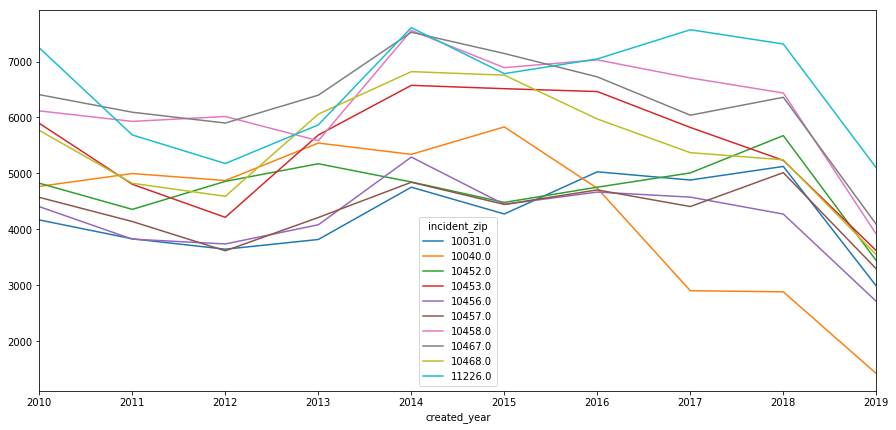

In [12]:
#Creates a new copy of the dataframe to create graphs on the top 10 zipcodes
NY311_df_heat_zipcodes = NY311_df_heat.copy()
indexNamesZips = NY311_df_heat_zipcodes[(NY311_df_heat_zipcodes['incident_zip'] != 11226) 
                                        & (NY311_df_heat_zipcodes['incident_zip'] != 10467)
                                        & (NY311_df_heat_zipcodes['incident_zip'] != 10458)
                                        & (NY311_df_heat_zipcodes['incident_zip'] != 10468)
                                        & (NY311_df_heat_zipcodes['incident_zip'] != 10453)
                                        & (NY311_df_heat_zipcodes['incident_zip'] != 10452)
                                        & (NY311_df_heat_zipcodes['incident_zip'] != 10040)
                                        & (NY311_df_heat_zipcodes['incident_zip'] != 10457)
                                        & (NY311_df_heat_zipcodes['incident_zip'] != 10031)
                                        & (NY311_df_heat_zipcodes['incident_zip'] != 10456)].index
NY311_df_heat_zipcodes.drop(indexNamesZips, inplace=True)
NY311_df_heat_zipcodes['incident_zip'].value_counts()
fig, ax = plt.subplots(figsize=(15,7))
NY311_df_heat_zipcodes.groupby(['created_year', 'incident_zip']).count()['unique_key'].unstack().plot(ax=ax)

In [13]:
# The additional visual insight through a graphical representation
# of the complaints from 2010-current on zipcodes
# confirm my results from the numerical analysis.

In [14]:
#Shows the number of values of different boroughs for Heat/Hot Water complaints
NY311_df_heat['borough'].value_counts()

BRONX            569329
BROOKLYN         542398
MANHATTAN        398016
Unspecified      282917
QUEENS           228206
STATEN ISLAND     17398
Name: borough, dtype: int64

In [15]:
# Based on numerical analysis of the borough data
# I believe that the agency should focus on Bronx and Brooklyn
# as those 2 boroughs have significantly higher counts than all other boroughs.

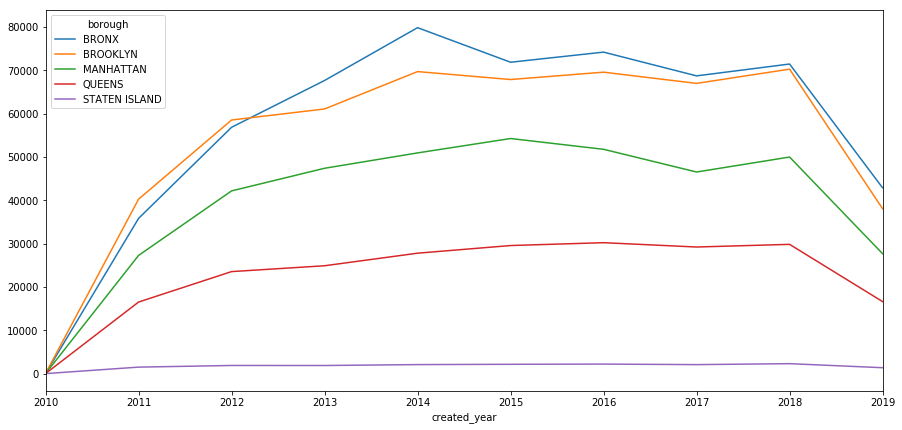

In [16]:
#Creates a new copy of the dataframe to create graphs on the different boroughs
NY311_df_heat_boroughs = NY311_df_heat.copy()
#Removing 'unspecified' as a value from the borough column
indexNamesBoroughs = NY311_df_heat_boroughs[NY311_df_heat_boroughs['borough'] == 'Unspecified'].index
NY311_df_heat_boroughs.drop(indexNamesBoroughs, inplace=True)
fig, ax = plt.subplots(figsize=(15,7))
NY311_df_heat_boroughs.groupby(['created_year', 'borough']).count()['unique_key'].unstack().plot(ax=ax)

In [17]:
# The additional visual insight through a graphical representation
# of the complaints from 2010-current on boroughs
# confirm my results from the numerical analysis.

In [18]:
#Shows the number of values of different addresses for Heat/Hot Water complaints
NY311_df_heat['street_name'].value_counts()

GRAND CONCOURSE             35934
BROADWAY                    23476
OCEAN AVENUE                17866
ARDEN STREET                15835
MORRIS AVENUE               15759
ST NICHOLAS AVENUE          14939
AMSTERDAM AVENUE            11835
ELMHURST AVENUE             10946
BOYNTON AVENUE              10807
DR M L KING JR BOULEVARD    10036
OCEAN PARKWAY                9965
WALTON AVENUE                9573
BAILEY AVENUE                9552
RIVERSIDE DRIVE              9178
LINDEN BOULEVARD             9158
SEDGWICK AVENUE              9108
DECATUR AVENUE               9086
NOSTRAND AVENUE              8825
CRESTON AVENUE               8679
SHERMAN AVENUE               7875
SHERIDAN AVENUE              7502
BEDFORD AVENUE               7486
EASTERN PARKWAY              7399
3 AVENUE                     7303
WALLACE AVENUE               7285
2 AVENUE                     7168
DAVIDSON AVENUE              6835
FT WASHINGTON AVENUE         6697
NEW YORK AVENUE              6661
VALENTINE AVEN

In [19]:
# Based on numerical analysis of the street data
# I believe that the agency should focus on Grand Concourse and Broadway
# as those 2 streets have significantly higher counts than all other streets.

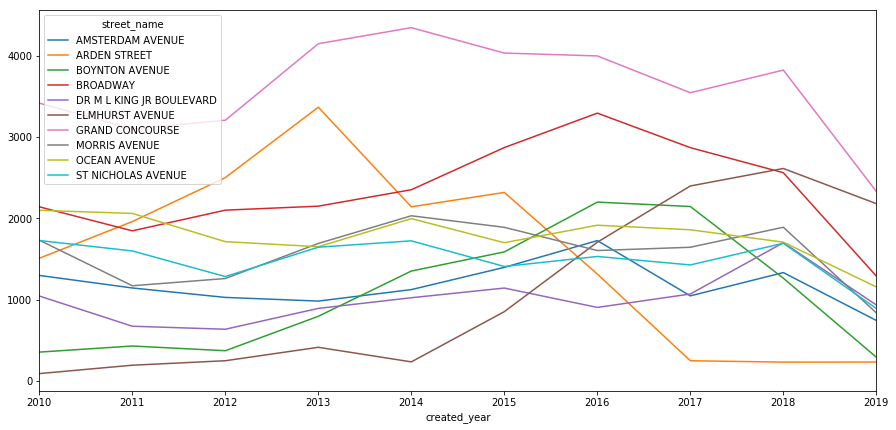

In [20]:
#Creates a new copy of the dataframe to create graphs on the top 10 streets
NY311_df_heat_streets = NY311_df_heat.copy()
indexNamesStreets = NY311_df_heat_streets[(NY311_df_heat_streets['street_name'] != 'GRAND CONCOURSE') 
                                        & (NY311_df_heat_streets['street_name'] != 'BROADWAY')
                                        & (NY311_df_heat_streets['street_name'] != 'OCEAN AVENUE')
                                        & (NY311_df_heat_streets['street_name'] != 'ARDEN STREET')
                                        & (NY311_df_heat_streets['street_name'] != 'MORRIS AVENUE')
                                        & (NY311_df_heat_streets['street_name'] != 'ST NICHOLAS AVENUE')
                                        & (NY311_df_heat_streets['street_name'] != 'AMSTERDAM AVENUE')
                                        & (NY311_df_heat_streets['street_name'] != 'ELMHURST AVENUE')
                                        & (NY311_df_heat_streets['street_name'] != 'BOYNTON AVENUE')
                                        & (NY311_df_heat_streets['street_name'] != 'DR M L KING JR BOULEVARD')].index
NY311_df_heat_streets.drop(indexNamesStreets, inplace=True)
NY311_df_heat_streets['incident_zip'].value_counts()
fig, ax = plt.subplots(figsize=(15,7))
NY311_df_heat_streets.groupby(['created_year', 'street_name']).count()['unique_key'].unstack().plot(ax=ax)

In [21]:
# The additional visual insight through a graphical representation
# of the complaints from 2010-current on streets
# confirm my results from the numerical analysis.
# However, through visual analysis, one can see that
# the number of complaints coming from Elmhurst Avenue
# has the largest increase in complaints per year after 2014.
# In fact, the 2nd most complaints in 2019 which is the current year
# the most complaints are coming from Elmhurst Avenue.
# This is why I believe that the agency should also look into Elmhurst Avenue.

In [22]:
#
#
# Concluding Remarks
#
#


# Based on all of the numerical data analysis and additional 
# visual insight through graphical representation data
# it is clear that to address Heat/Hot Water complaints,
# the zipcodes the agency should focus on are 11226, 10467, and 10458,
# the boroughs the agency should focus on are Bronx and Brooklyn, and
# the streets the agency should focus on are Grand Concourse, Broadway, and Elmhurst Avenue.